In [1]:
import numpy as np
np.random.seed(42)  # we may or may not need a seed, but it's a good practice for reproducibility

import pandas as pd
# pandas tutorial - https://pandas.pydata.org/pandas-docs/stable/10min.html
# pandas cheatsheet - http://datacamp-community.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8

# jupyter notebook supports inline plotting - %matplotlib inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.model_selection

# download from https://www.kaggle.com/mirichoi0218/insurance/version/1
dataFile = "C:\\Users\\zkew18d\\source\\repos\\MyScikit-Learn\\data\\insurance.csv"

# read the data and output some basic descriptive info
rawData = pd.read_csv(dataFile)
rawData.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
# columns, types, sizes
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [3]:
# mean, standard deviation, quantiles
rawData.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
# data quality - how many values are missing?
pd.isna(rawData).sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
# what is the domain of our category data?
print( rawData['sex'].unique() )
print( rawData['smoker'].unique() )
print( rawData['region'].unique() )

['female' 'male']
['yes' 'no']
['southwest' 'southeast' 'northwest' 'northeast']


In [6]:
# clone the data and process it to make our tools more effective
data = rawData.copy()

# 0 for female and 1 for male
data['sex'] = data['sex'].map({'female': 0, 'male': 1})

# 0 for no and 1 for yes
data['smoker'] = data['smoker'].map({'no': 0, 'yes': 1})

# one hot encoding for the four regions
data['ne'] = (data['region'] == 'northeast').astype(int)
data['nw'] = (data['region'] == 'northwest').astype(int)
data['sw'] = (data['region'] == 'southwest').astype(int)
data['se'] = (data['region'] == 'southeast').astype(int)

# we don't need the region column anymore
data = data.drop(columns=['region'], axis=1)

data.head()

,age,sex,bmi,children,smoker,charges,ne,nw,sw,se
0,19,0,27.900,0,1,16884.92400,0,0,1,0
1,18,1,33.770,1,0,1725.55230,0,0,0,1
2,28,1,33.000,3,0,4449.46200,0,0,0,1
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [7]:
data.describe()

,age,sex,bmi,children,smoker,charges,ne,nw,sw,se
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265,0.242152,0.242900,0.242900,0.272048
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237,0.428546,0.428995,0.428995,0.445181
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515,0.000000,0.000000,0.000000,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000


In [8]:
# Time to split our data into a training set and a test set

[trainData, testData] = sklearn.model_selection.train_test_split(data, test_size=0.2)
print('training data record count: %d', len(trainData))
print('test data record count: %d', len(testData))

training data record count: %d 1070
test data record count: %d 268


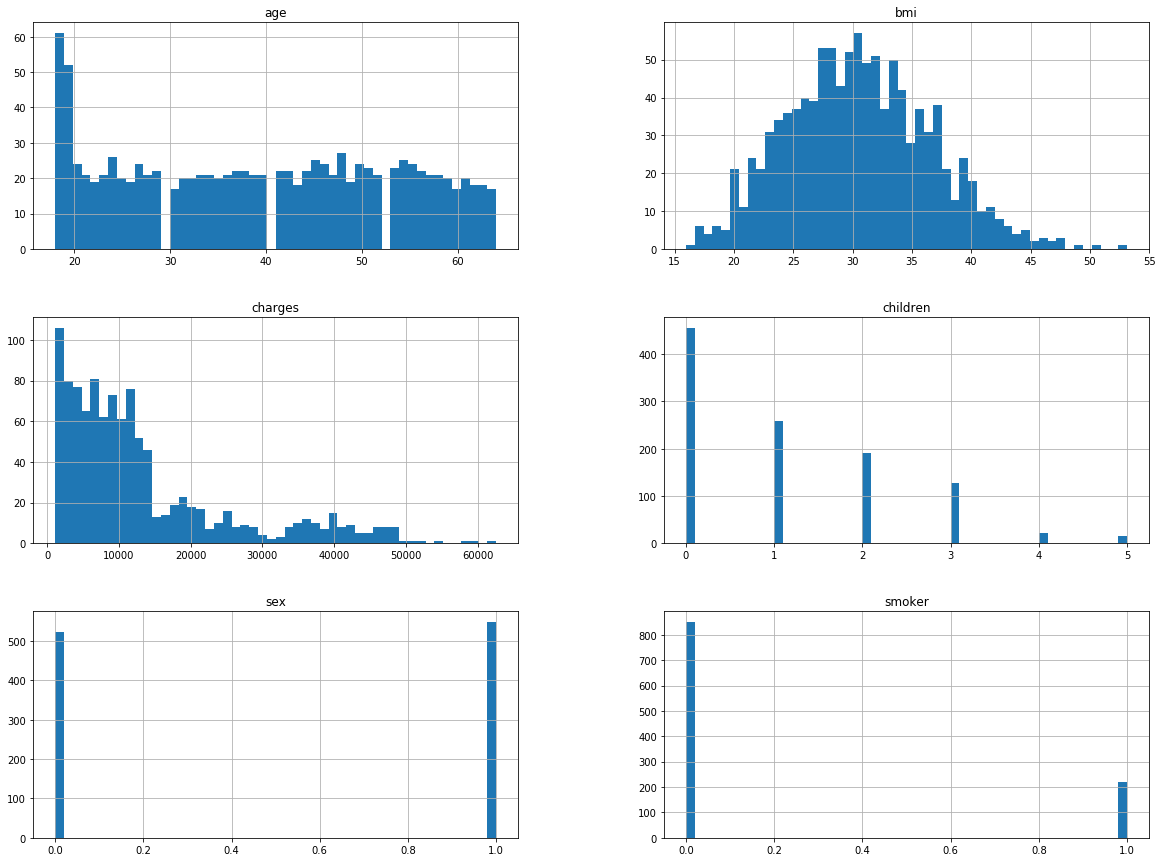

In [9]:
# From now on, we only deal with the training data until we think that we're done and ready to test

trainData.drop(columns=['ne','nw','sw','se'], axis=1).hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
# Matrix of correlation coefficients
# Note the figure on https://en.wikipedia.org/wiki/Correlation_and_dependence

trainData.corr()

,age,sex,bmi,children,smoker,charges,ne,nw,sw,se
age,1.000000,-0.008459,0.118274,0.060999,-0.052035,0.281721,-0.019700,0.013019,0.022307,-0.015068
sex,-0.008459,1.000000,0.015293,0.017080,0.070908,0.056802,0.005427,0.017047,-0.013911,-0.008217
bmi,0.118274,0.015293,1.000000,-0.005040,-0.003450,0.197316,-0.151206,-0.112666,0.010248,0.247317
children,0.060999,0.017080,-0.005040,1.000000,0.013994,0.071885,-0.004791,0.033319,-0.002450,-0.025133
smoker,-0.052035,0.070908,-0.003450,0.013994,1.000000,0.780063,0.011237,-0.030547,-0.033688,0.051450
charges,0.281721,0.056802,0.197316,0.071885,0.780063,1.000000,-0.000628,-0.033776,-0.034994,0.067491
ne,-0.019700,0.005427,-0.151206,-0.004791,0.011237,-0.000628,1.000000,-0.323374,-0.330014,-0.345783
nw,0.013019,0.017047,-0.112666,0.033319,-0.030547,-0.033776,-0.323374,1.000000,-0.320954,-0.336290
sw,0.022307,-0.013911,0.010248,-0.002450,-0.033688,-0.034994,-0.330014,-0.320954,1.000000,-0.343194
se,-0.015068,-0.008217,0.247317,-0.025133,0.051450,0.067491,-0.345783,-0.336290,-0.343194,1.000000
